What is Bayes' Rule?

Simply stated, Bayes' Theorem finds the probability of a given event based on some prior knowledge of something that affects the event. Going back to our graduate example, the probability of having a large number of graduates is probably reliant on the year chosen. So by giving the year, you could come up with the probability of having a large number of students.

So what does this theorem look like?

P(A | B) = P(B | A) P(A) / P(B)

Or in other words,

P(Large Class | 2017) = (P(2017 | Large Class) * P(Large Class))/ P(2017)

The Prior is P(Large Class)
The posterior is P(Large Class | 2017)
The likelihood is P(2017 | Large Class)

Many examples of Bayesian Inference start with coin flips. We'll use that example here. Suppose you have a coin that, if flipped, you would expect to have heads 50% of the time. But a friend of yours, who has a penchant for strange objects, gave you the coin, leading you to think that maybe the coin could be a trick coin and could give you more tails than heads.

Assuming that we flip the coin 100 times and we get 30 heads, what's the probability of getting a heads on a given flip?

Here, our prior is .5
Let's figure out the rest of the problem.

Utilizing functions created by Fong Chun Chan, we can start visualizing the distributions.

In [2]:
library(dplyr)
library(ggplot2)

# Uses vals to generate a triangle probability distribution
get_prior_distr <- function(vals) {
  vals.pmin <- pmin(vals, 1 - vals)
  
  # Creates a data frame for the values and normalizes the prior so that they sum to 1.
  dplyr::data_frame(theta = vals,
                    prior = vals.pmin / sum(vals.pmin))
}

# Define the Space of all theta values
theta.vals <- seq(0, 1, 0.1)

theta.prior.distr.df <- get_prior_distr(theta.vals)

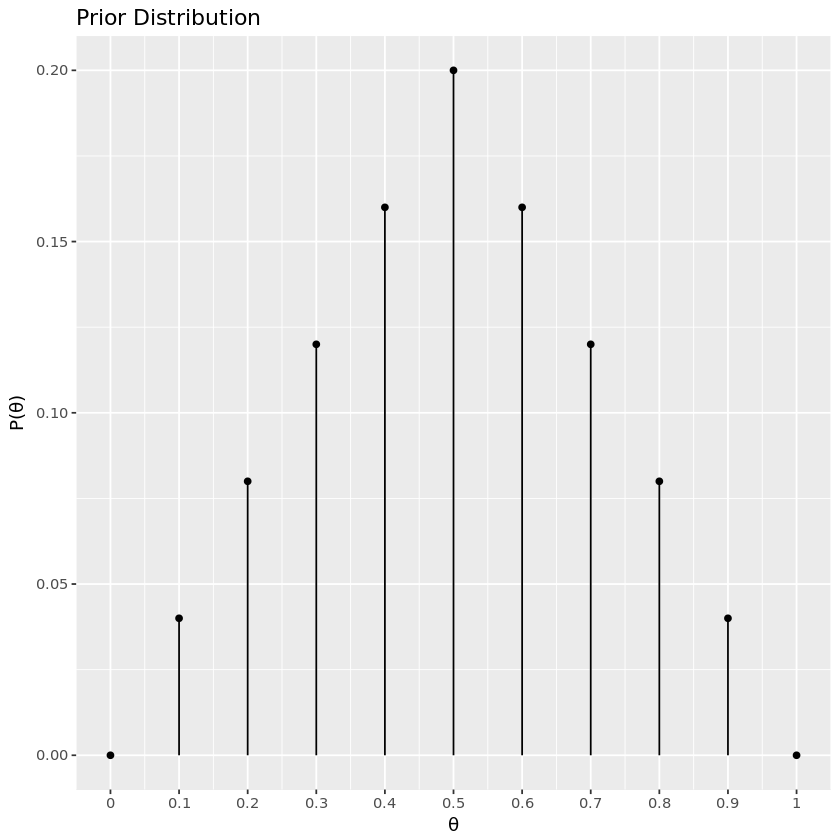

In [3]:
# Plots the Prior Probability Distribution

plot_prior_distr <- function(prior.distr.df, plot.x.labels = TRUE) {
  
  theta.prior.p <- 
    prior.distr.df %>%
    ggplot(aes(x = theta, y = prior)) +
    geom_point() +
    geom_segment(aes(x = theta, xend = theta, y = prior, yend = 0)) +
    xlab(expression(theta)) +
    ylab(expression(paste("P(", theta, ")"))) +
    ggtitle("Prior Distribution") 
  
  if (plot.x.labels) {
    theta.vals <- prior.distr.df[["theta"]]
    
    theta.prior.p <- 
      theta.prior.p + 
      scale_x_continuous(breaks = c(theta.vals),
                         labels = theta.vals)
  }
  
  theta.prior.p
}

plot_prior_distr(theta.prior.distr.df)
